In [19]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [20]:
# Importing Data
INPUT_PATH = "E:/Programming/MLMomeni/ML/files/Superstore.xlsx"
df = pd.read_excel(INPUT_PATH)
df.columns = df.columns.map(lambda x: x.strip() if isinstance(x, str) else x)# To delete any spaces between
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,price,Quantity,Discount,Profit,sales,Datediff
0,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,Central,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110,418.600,0
1,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,1292.544,0
2,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,636.510,0
3,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,158.328,0
4,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,27.808,0


In [5]:
basket = df.groupby("Order ID")["Sub-Category"].apply(list)
basket

Order ID
CA-2014-100006                                             [Phones]
CA-2014-100090                                    [Tables, Binders]
CA-2014-100293                                              [Paper]
CA-2014-100328                                            [Binders]
CA-2014-100363                                   [Fasteners, Paper]
                                        ...                        
US-2017-168802                                            [Binders]
US-2017-169320                                   [Art, Accessories]
US-2017-169488                                       [Paper, Paper]
US-2017-169502                               [Supplies, Appliances]
US-2017-169551    [Bookcases, Paper, Phones, Storage, Accessorie...
Name: Sub-Category, Length: 5009, dtype: object

In [6]:
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)
basket_df

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5005,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5006,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5007,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.143342,(Accessories)
1,0.090038,(Appliances)
2,0.145937,(Art)
3,0.262727,(Binders)
4,0.044720,(Bookcases)
...,...,...
63,0.023358,"(Storage, Phones)"
64,0.010381,"(Tables, Phones)"
65,0.010182,"(Binders, Furnishings, Paper)"
66,0.010781,"(Binders, Paper, Phones)"


In [8]:
frequent_itemset_top_20 = frequent_itemsets.sort_values(by='support', ascending=False).head(20)
frequent_itemset_top_20 = frequent_itemset_top_20.reset_index(drop=True)
frequent_itemset_top_20

,support,itemsets
0,0.262727,(Binders)
1,0.237772,(Paper)
2,0.175085,(Furnishings)
3,0.162507,(Phones)
4,0.155121,(Storage)
5,0.145937,(Art)
6,0.143342,(Accessories)
7,0.114993,(Chairs)
8,0.090038,(Appliances)
9,0.069076,(Labels)


In [9]:
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by='support', ascending=False)
top_pairs

,support,itemsets
43,0.054901,"(Binders, Paper)"
45,0.039728,"(Binders, Storage)"
44,0.039728,"(Binders, Phones)"
41,0.039529,"(Binders, Furnishings)"
61,0.035536,"(Storage, Paper)"
54,0.035336,"(Furnishings, Paper)"
60,0.034937,"(Paper, Phones)"
19,0.032142,"(Binders, Accessories)"
22,0.030545,"(Paper, Accessories)"
34,0.029946,"(Art, Paper)"


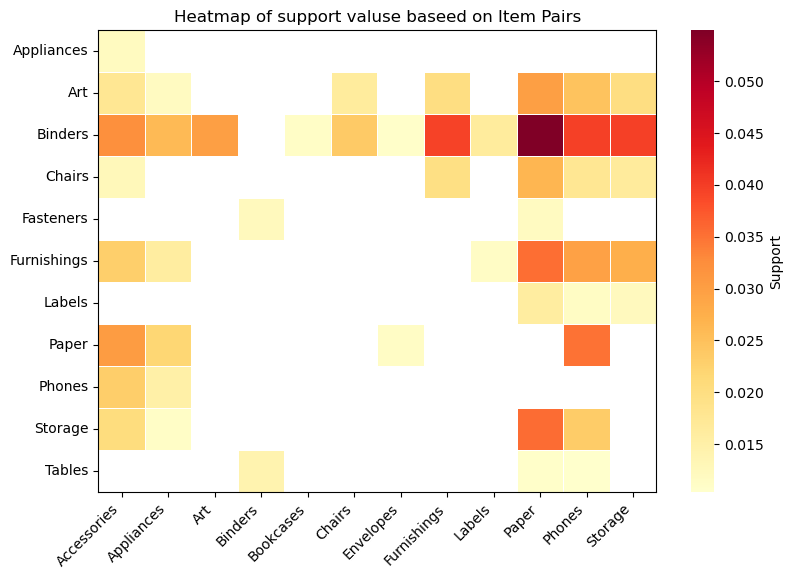

In [10]:
top_pairs['Item 1'] = top_pairs['itemsets'].apply(lambda x: list(x)[0])
top_pairs['Item 2'] = top_pairs['itemsets'].apply(lambda x: list(x)[1])

heatmap_data = pd.crosstab(top_pairs['Item 1'], top_pairs['Item 2'], values=top_pairs['support'], aggfunc='mean', dropna=True)

plt.figure(figsize=(9, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, fmt='.if', cbar_kws={'label' : 'Support'}, linewidths=0.5)
plt.title("Heatmap of support valuse baseed on Item Pairs")
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xlabel('')
plt.ylabel('')
plt.show()

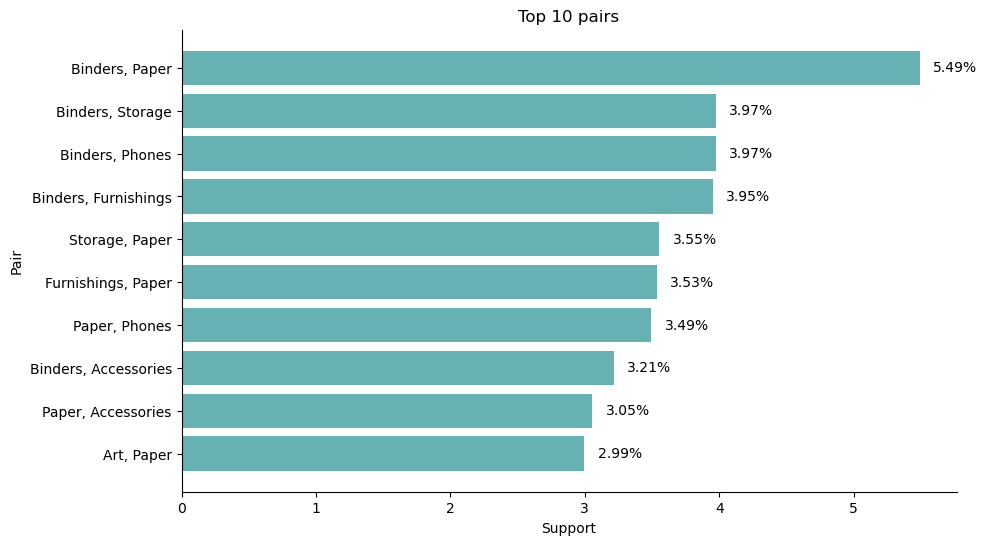

In [11]:
# Get top 10 pairs sorted by support
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by='support', ascending =False).head(10)

top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ', '.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100

plt.figure(figsize=(10, 6))
bars = plt.barh(pairs, support_values, color= '#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Support')
plt.ylabel('Pair')
plt.title('Top 10 pairs')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

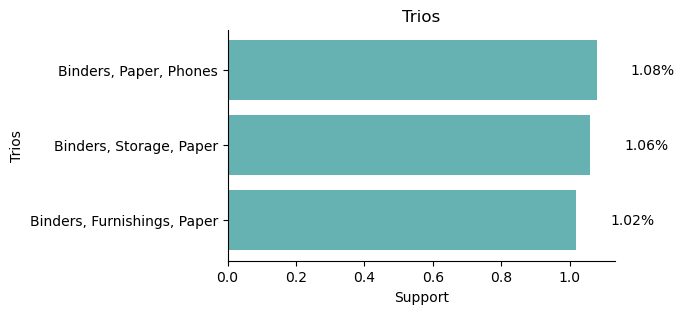

In [12]:
# Get top 10 pairs sorted by support
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)].sort_values(by='support', ascending =False).head(10)

top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ', '.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100

plt.figure(figsize=(5, 3))
bars = plt.barh(pairs, support_values, color= '#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Support')
plt.ylabel('Trios')
plt.title('Trios')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

In [13]:
# Lift
raw_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = raw_rules[['antecedents', 'consequents','antecedent support', 'consequent support', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending= False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
40,(Storage),"(Binders, Paper)",0.155121,0.054901,0.010581,0.068211,1.242434
37,"(Binders, Paper)",(Storage),0.054901,0.155121,0.010581,0.192727,1.242434
35,(Phones),"(Binders, Paper)",0.162507,0.054901,0.010781,0.066339,1.208336
30,"(Binders, Paper)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336
33,(Binders),"(Paper, Phones)",0.262727,0.034937,0.010781,0.041033,1.174494
32,"(Paper, Phones)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494
12,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125
13,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125
34,(Paper),"(Binders, Phones)",0.237772,0.039728,0.010781,0.045340,1.141248
31,"(Binders, Phones)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248


In [14]:
rules['rule'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(x))) + ' --> ' + rules['consequents'].apply(lambda x: ', '.join(sorted(x)))
rules = rules[['rule'] + [col for col in rules.columns if col != 'rule']]
rules = rules.reset_index(drop=True)
rules

,rule,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,"Storage --> Binders, Paper",(Storage),"(Binders, Paper)",0.155121,0.054901,0.010581,0.068211,1.242434
1,"Binders, Paper --> Storage","(Binders, Paper)",(Storage),0.054901,0.155121,0.010581,0.192727,1.242434
2,"Phones --> Binders, Paper",(Phones),"(Binders, Paper)",0.162507,0.054901,0.010781,0.066339,1.208336
3,"Binders, Paper --> Phones","(Binders, Paper)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336
4,"Binders --> Paper, Phones",(Binders),"(Paper, Phones)",0.262727,0.034937,0.010781,0.041033,1.174494
5,"Paper, Phones --> Binders","(Paper, Phones)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494
6,Fasteners --> Paper,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125
7,Paper --> Fasteners,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125
8,"Paper --> Binders, Phones",(Paper),"(Binders, Phones)",0.237772,0.039728,0.010781,0.045340,1.141248
9,"Binders, Phones --> Paper","(Binders, Phones)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248


In [15]:
rules[(rules['lift'] > 1) & rules['confidence'] > 0.2]

,rule,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,"Storage --> Binders, Paper",(Storage),"(Binders, Paper)",0.155121,0.054901,0.010581,0.068211,1.242434
1,"Binders, Paper --> Storage","(Binders, Paper)",(Storage),0.054901,0.155121,0.010581,0.192727,1.242434
2,"Phones --> Binders, Paper",(Phones),"(Binders, Paper)",0.162507,0.054901,0.010781,0.066339,1.208336
3,"Binders, Paper --> Phones","(Binders, Paper)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336
4,"Binders --> Paper, Phones",(Binders),"(Paper, Phones)",0.262727,0.034937,0.010781,0.041033,1.174494
5,"Paper, Phones --> Binders","(Paper, Phones)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494
6,Fasteners --> Paper,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125
7,Paper --> Fasteners,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125
8,"Paper --> Binders, Phones",(Paper),"(Binders, Phones)",0.237772,0.039728,0.010781,0.045340,1.141248
9,"Binders, Phones --> Paper","(Binders, Phones)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248


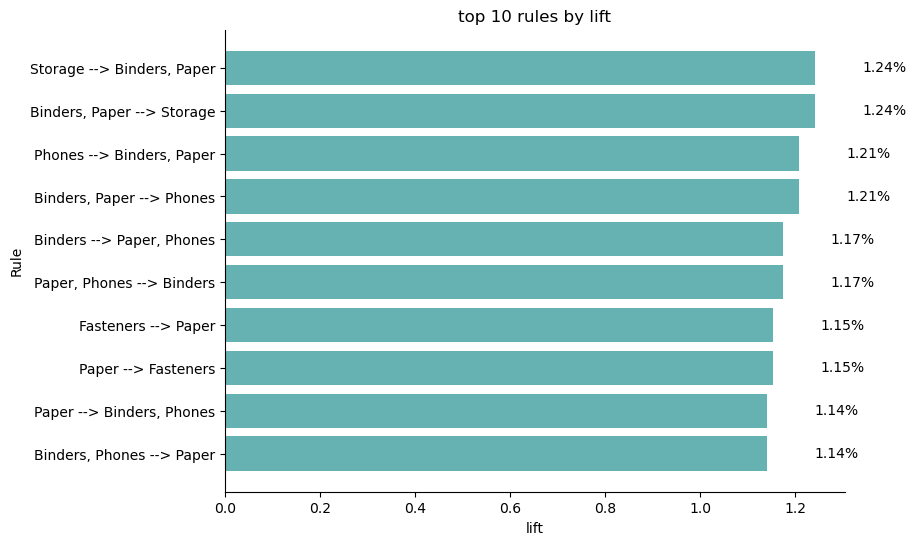

In [16]:
rule = rules['rule'].head(10)
lift_values = rules['lift'].head(10)

plt.figure(figsize=(8, 6))
bars = plt.barh(rule, lift_values, color= '#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('lift')
plt.ylabel('Rule')
plt.title('top 10 rules by lift')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

In [18]:
#Save final dataframe to an excel file
OUTPUT_XLSX = "Association Rules.xlsx"
with pd.ExcelWriter(OUTPUT_XLSX, engine="openpyxl") as writer:
    rules.to_excel(writer, index=False, sheet_name="Clusters")
print("Saved to", OUTPUT_XLSX)

Saved to Association Rules.xlsx
